# Base de classification finale

In [58]:
import pandas as pd
import numpy as np

In [32]:
anglais = pd.read_csv('corpus_en_notes.csv',index_col=0)
anglais = anglais.reset_index(drop=True)
anglais2 = pd.read_csv('corpus_en_de_notes.csv',index_col=0)
anglais2 = anglais.reset_index(drop=True)
# attention, il faut les memes colonnes
anglais2 = anglais[anglais.columns]
anglais = pd.concat([anglais,anglais2],axis=0).reset_index(drop=True)

In [33]:
# attention certains textes ne sont pas fournies et donc mis en "Error" : A supprimer donc
# On pourrait éventuellement tester en ne prenant plus les meth similarités ds les predicteurs
anglais = anglais[anglais.meth1_similarites!='Error']

In [34]:
anglais['Overall2'] = anglais.Overall
anglais

,ligne,title_1,title_2,text_1,text_2,Geography,Entities,Time,Narrative,Overall,...,score_similarite_resume1,score_similarite_resume2,score_classif1,score_classif2,score_sentiment1,score_sentiment2,score_sentiment3,meth1_similarites,meth2_similarites,Overall2
0,0,Virginia man arrested in fatal DUI crash in We...,Haiti’s leader marks independence day amid sec...,"MARTINSBURG, W.Va. — A suspected drunken drive...","PORT-AU-PRINCE, Haiti — Haitian President Jove...",4.0,4.000000,1.000000,4.000000,4.000000,...,3.79,51.00,10.42,8.33,32.09,13.47,99.20,818.0,231.9,4.000000
1,1,Guyana: Three injured after car crashes into u...,Fire kills more than 30 animals at zoo in west...,Share This On:\n\nPin 11 Shares\n\n(NEWS ROOM ...,BERLIN - A fire at a zoo in western Germany in...,4.0,4.000000,1.000000,4.000000,3.666667,...,9.10,2.91,10.57,8.34,28.15,92.87,99.04,129.5,174.9,3.666667
2,2,Trump Brings In 2020 At Mar-a-Lago: ‘We’re Goi...,"Trump says he does not expect war with Iran, ‘...",(Breitbart) – President Donald Trump welcomed ...,"PALM BEACH, United States — US President Donal...",1.0,2.000000,1.000000,2.333333,2.333333,...,27.45,9.68,13.14,8.33,25.00,2.56,96.75,827.2,504.8,2.333333
3,3,Zomato Buys Uber's Food Delivery Business in I...,Indian Online Food Delivery Market to Hit $8 B...,Uber has sold its online food-ordering busines...,Rapid digitisation and growth in both online b...,1.0,2.333333,2.666667,1.666667,2.000000,...,27.90,10.34,18.21,8.35,23.79,93.55,94.72,620.0,735.1,2.000000
4,4,"India approves third moon mission, months afte...",India targets new moon mission in 2020,BENGALURU (Reuters) - India has approved its t...,BANGALORE: India plans to make a fresh attempt...,1.0,1.250000,1.000000,1.250000,1.250000,...,32.40,-1.95,15.76,8.35,26.28,74.48,93.05,473.0,559.4,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,3444,Migrate or Clone VMs to new vCenter at other site,vCenter Email Alerts not working anymore?,"Hello,\n\nWe are preparing to move our environ...",I'm running vCenter 6.7 w/ three host also run...,4.0,3.000000,1.000000,2.000000,3.000000,...,0.96,-0.44,52.18,9.54,28.40,97.16,99.92,289.7,418.5,3.000000
3592,3445,You can now consult with your doctors through ...,Never waste a crisis,You can now consult with your doctors through ...,India is doing a commendable job in fighting t...,1.0,4.000000,3.000000,4.000000,4.000000,...,14.06,1.64,27.53,8.29,31.73,1.55,13.10,40.4,150.6,4.000000
3593,3446,Thai soldier who killed 20 is shot dead,Thai soldier shot dead after killing 26 in cou...,Jakraphanth Thomma on Saturday killed his comm...,Medics carry a stretcher towards a Thai shoppi...,1.0,2.000000,1.000000,2.000000,1.000000,...,40.11,24.78,10.46,8.36,46.47,84.41,97.96,547.7,717.2,1.000000
3594,3447,More than 80 people taken in for questioning a...,Gauteng police take in 87 people for questioni...,The bodies of the victims were found lying in ...,Johannesburg - Gauteng police on Saturday said...,1.0,1.000000,1.000000,1.000000,1.000000,...,29.80,-0.50,10.97,8.42,19.91,1.06,93.64,1364.2,440.1,1.000000


In [35]:
anglais = anglais.round({'Geography':0, 'Entities':0,'Time':0, 'Narrative':0, 'Overall':0, 'Style':0, 'Tone':0, 'Overall2':3})

In [36]:
partiel = anglais[['Geography', 'Entities','Time', 'Narrative', 'Overall', 'Style', 'Tone']].astype('int32')

In [37]:
anglais = pd.concat([anglais[['ligne', 'title_1', 'title_2', 'text_1', 'text_2','summary1_text1', 'summary2_text1', 'summary1_text2', 'summary2_text2']],
        partiel,anglais[['Overall2','nb_entites_idem', 'nb_lieux_idem', 'nb_dates_idem', 'entites_idem','dates_idem', 'score_similarite_titres',
       'score_similarite_resume1', 'score_similarite_resume2','score_classif1', 'score_classif2', 'score_sentiment1',
       'score_sentiment2', 'score_sentiment3', 'meth1_similarites', 'meth2_similarites']]],axis=1)

In [38]:
anglais = anglais.reset_index(drop=True)
anglais

,ligne,title_1,title_2,text_1,text_2,summary1_text1,summary2_text1,summary1_text2,summary2_text2,Geography,...,score_similarite_titres,score_similarite_resume1,score_similarite_resume2,score_classif1,score_classif2,score_sentiment1,score_sentiment2,score_sentiment3,meth1_similarites,meth2_similarites
0,0,Virginia man arrested in fatal DUI crash in We...,Haiti’s leader marks independence day amid sec...,"MARTINSBURG, W.Va. — A suspected drunken drive...","PORT-AU-PRINCE, Haiti — Haitian President Jove...","Cody Wade Braithwaite, 32, of Winchester, Vir...",All images are copyrighted.,New Year's Day marked by protests over lack o...,All images are copyrighted.,4,...,0.80,3.79,51.00,10.42,8.33,32.09,13.47,99.20,818.0,231.9
1,1,Guyana: Three injured after car crashes into u...,Fire kills more than 30 animals at zoo in west...,Share This On:\n\nPin 11 Shares\n\n(NEWS ROOM ...,BERLIN - A fire at a zoo in western Germany in...,Motorcar PNN 7976 driven by 22-year-old Seera...,All images are copyrighted.,Fire at a zoo in western Germany in the first...,A fire at a zoo in western Germany in the firs...,4,...,6.44,9.10,2.91,10.57,8.34,28.15,92.87,99.04,129.5,174.9
2,2,Trump Brings In 2020 At Mar-a-Lago: ‘We’re Goi...,"Trump says he does not expect war with Iran, ‘...",(Breitbart) – President Donald Trump welcomed ...,"PALM BEACH, United States — US President Donal...",President Trump welcomed guests to Mar-a-Lago...,"It’s a new year, but it’s also a new president.",U.S. President Donald Trump says he does not ...,US President Donald Trump says he does not for...,1,...,20.70,27.45,9.68,13.14,8.33,25.00,2.56,96.75,827.2,504.8
3,3,Zomato Buys Uber's Food Delivery Business in I...,Indian Online Food Delivery Market to Hit $8 B...,Uber has sold its online food-ordering busines...,Rapid digitisation and growth in both online b...,Uber has sold its online food-ordering busine...,It's food for thought for Uber.,India's online food industry to become an $8 ...,"""Ordering food online is now a habit.""",1,...,24.97,27.90,10.34,18.21,8.35,23.79,93.55,94.72,620.0,735.1
4,4,"India approves third moon mission, months afte...",India targets new moon mission in 2020,BENGALURU (Reuters) - India has approved its t...,BANGALORE: India plans to make a fresh attempt...,India has approved its third lunar mission mo...,All images are copyrighted.,"Work is going ""smoothly"" on the Chandrayaan-3...","""We are targeting the launch for this year but...",1,...,29.21,32.40,-1.95,15.76,8.35,26.28,74.48,93.05,473.0,559.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,3444,Migrate or Clone VMs to new vCenter at other site,vCenter Email Alerts not working anymore?,"Hello,\n\nWe are preparing to move our environ...",I'm running vCenter 6.7 w/ three host also run...,We are preparing to move our environment to a...,Is there a way to clone VMs to a new site whil...,I'm not sure if some updates has stopped this...,I'm trying to get Office 365 to send me email ...,4,...,15.18,0.96,-0.44,52.18,9.54,28.40,97.16,99.92,289.7,418.5
3398,3445,You can now consult with your doctors through ...,Never waste a crisis,You can now consult with your doctors through ...,India is doing a commendable job in fighting t...,The government has released the much-awaited ...,Can’t make it to the hospital? The guidelines ...,India is doing a commendable job in fighting ...,As the World Health Organization (WHO) reports...,1,...,4.29,14.06,1.64,27.53,8.29,31.73,1.55,13.10,40.4,150.6
3399,3446,Thai soldier who killed 20 is shot dead,Thai soldier shot dead after killing 26 in cou...,Jakraphanth Thomma on Saturday killed his comm...,Medics carry a stretcher towards a Thai shoppi...,Jakraphanth Thomma on Saturday killed his com...,Thailand's health minister has praised the sec...,Sergeant Major Jakrapanth Thomma killed 26 pe...,Thai police have shot dead a soldier who kille...,1,...,40.45,40.11,24.78,10.46,8.36,46.47,84.41,97.96,547.7,717.2
3400,3447,More tha

In [39]:
# en fait 2 lignes avec un score nan : 469 et 2170, le reste est OK
anglais = anglais.fillna(0)

In [40]:
taille_train = 500
dernier_test = 3402    

In [41]:
predicteurs = ['nb_entites_idem', 'nb_lieux_idem', 'nb_dates_idem', 'score_similarite_titres', 'score_similarite_resume1',
    'score_similarite_resume2', 'score_classif1', 'score_classif2','score_sentiment1', 
    'score_sentiment2', 'score_sentiment3', 'meth1_similarites','meth2_similarites']

In [42]:
# from pycaret.classification import *
# from sklearn.ensemble import RandomForestClassifier
# english_classif = setup(data = anglais[predicteurs + ['Overall']],  target = 'Overall', html=False, silent=True, verbose=False)

In [43]:
# lr = create_model('lr')
# rf = create_model('rf')
# xgb = create_model('xgboost')
# ada = create_model('ada')
# lda = create_model('lda')  # linear discriminant
# knn = create_model('knn')
# mlp = create_model('mlp')
# svm = create_model('svm')
# rbfsvm = create_model('rbfsvm')
# nb = create_model('nb')
# gpc = create_model('gpc')

In [44]:
essai_classif = anglais[['Overall', 'Overall2', 'Tone','nb_entites_idem', 
    'nb_lieux_idem', 'nb_dates_idem', 'score_similarite_titres', 'score_similarite_resume1','score_similarite_resume2', 
    'score_classif1', 'score_classif2','score_sentiment1', 'score_sentiment2', 'score_sentiment3','meth1_similarites','meth2_similarites']]

In [45]:
# Si on veut utiliser faire un classemen,t supprimer ligne error puis changer les types pour meth1 meth2
essai_classif = essai_classif[essai_classif.meth1_similarites != 'Error']
essai_classif['meth1_similarites'] = essai_classif['meth1_similarites'].astype('float')
essai_classif['meth2_similarites'] = essai_classif['meth2_similarites'].astype('float')
essai_classif.dtypes

Overall                       int32
Overall2                    float64
Tone                          int32
nb_entites_idem               int64
nb_lieux_idem                 int64
nb_dates_idem                 int64
score_similarite_titres     float64
score_similarite_resume1    float64
score_similarite_resume2    float64
score_classif1              float64
score_classif2              float64
score_sentiment1            float64
score_sentiment2            float64
score_sentiment3            float64
meth1_similarites           float64
meth2_similarites           float64
dtype: object

In [46]:
# random Forest simple sur scikit learn
Xtrain = essai_classif[predicteurs].reset_index(drop=True)
ytrain = essai_classif['Overall'].reset_index(drop=True)

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtrain[:taille_train],ytrain[:taille_train])

RandomForestClassifier()

In [48]:
res_rf = rf.predict(Xtrain[taille_train:])
res_rf = pd.concat([Xtrain[taille_train:],ytrain[taille_train:],pd.DataFrame(res_rf,columns = ['RF'],index = range(taille_train,dernier_test))],axis=1)
res_rf

,nb_entites_idem,nb_lieux_idem,nb_dates_idem,score_similarite_titres,score_similarite_resume1,score_similarite_resume2,score_classif1,score_classif2,score_sentiment1,score_sentiment2,score_sentiment3,meth1_similarites,meth2_similarites,Overall,RF
500,0,0,0,5.90,1.28,1.53,8.58,8.44,8.96,1.82,95.37,0.0,432.2,3,4
501,12,0,6,50.38,40.52,-1.43,11.16,8.37,28.23,84.30,99.21,836.8,955.1,1,1
502,0,0,5,4.40,4.84,-3.35,6.38,8.40,21.31,39.07,64.69,406.8,505.5,4,4
503,0,0,0,1.54,1.41,15.27,8.01,8.33,9.04,20.11,3.27,0.0,0.0,4,4
504,10,0,0,12.28,14.97,5.67,10.96,8.33,21.39,8.42,95.43,722.7,314.2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,0,0,0,15.18,0.96,-0.44,52.18,9.54,28.40,97.16,99.92,289.7,418.5,3,3
3398,2,0,0,4.29,14.06,1.64,27.53,8.29,31.73,1.55,13.10,40.4,150.6,4,4
3399,7,0,6,40.45,40.11,24.78,10.46,8.36,46.47,84.41,97.96,547.7,717.2,1,1
3400,9,0,1,22.58,29.80,-0.50,10.97,8.42,19.91,1.06,93.64,1364.2,440.1,1,2


In [49]:
# Résultats corrects : 2116/2900 - 658/2900 : 1 d'écart 110/2900 : 2 d'écart et 16/2900 : 3 écart 
from sklearn.metrics import confusion_matrix
confusion_matrix(res_rf.Overall,res_rf.RF)

array([[ 380,   78,    8,   16],
       [ 106,  307,   64,   30],
       [  16,   94,  238,  212],
       [   4,   48,   86, 1215]], dtype=int64)

In [51]:
res_rf = pd.concat([res_rf,anglais.Overall2[500:]],axis=1)

In [52]:
from scipy.stats import pearsonr
corr, _ = pearsonr(res_rf.Overall, res_rf.RF)

In [53]:
corr

0.8431947809257406

In [54]:
corr, _ = pearsonr(res_rf.Overall2, res_rf.RF)

In [55]:
corr

0.8460866744263411

In [56]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf, Xtrain, ytrain, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
sorted_idx

array([ 2,  1,  7,  8,  9, 11,  5, 10,  0,  6, 12,  4,  3], dtype=int64)

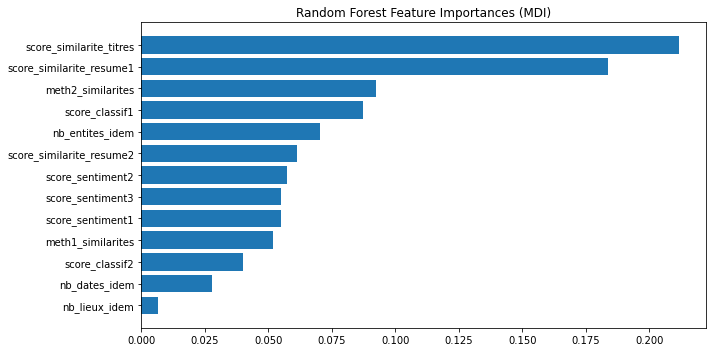

In [59]:
import matplotlib
import matplotlib.pyplot as plt
tree_feature_importances = rf.feature_importances_
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(predicteurs))
fig, ax = plt.subplots(figsize = (10,5))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(np.array(predicteurs)[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(Xtrain[:taille_train],ytrain[:taille_train])
res_lda = lda.predict(Xtrain[taille_train:])
res_final = pd.concat([res_rf[['Overall','RF']],pd.DataFrame(res_lda,columns = ['LDA'],index = range(taille_train,dernier_test))],axis=1)
res_final

,Overall,RF,LDA
500,3,4,4
501,1,1,1
502,4,4,4
503,4,4,4
504,4,3,4
...,...,...,...
3397,3,3,3
3398,4,4,4
3399,1,1,1
3400,1,2,2


In [61]:
from numpy import around
import numpy
np.set_printoptions(suppress=True)  # supprime notation exp
res_lda2 = around(lda.predict_proba(Xtrain[taille_train:])*100, decimals=2)
res_lda2

array([[ 0.  ,  0.22,  7.42, 92.36],
       [98.95,  1.05,  0.  ,  0.  ],
       [ 0.  ,  0.29,  9.76, 89.95],
       ...,
       [94.47,  5.49,  0.03,  0.  ],
       [24.11, 57.55, 15.16,  3.18],
       [98.59,  1.41,  0.  ,  0.  ]])

In [62]:
res_rf2 = around(rf.predict_proba(Xtrain[taille_train:])*100, decimals=2)
res_rf2

array([[ 0.,  1.,  4., 95.],
       [78., 18.,  2.,  2.],
       [ 0.,  1.,  4., 95.],
       ...,
       [76., 21.,  3.,  0.],
       [29., 38., 25.,  8.],
       [83., 13.,  3.,  1.]])

**_Remarquer que la classification ne tient pas compte du fait que c'est ordonné en classement 1-2-3-4 : ce qui est TRES important (ex : ligne 55% de 1 - 43% de 4) !! : il faudrait donc faire ressortir un score avec les probas plutot !!!_**

In [63]:
# Nouveau programme basé sur les scores probas : si plus de 50% mettre catégorie obtenue sinon, faire la somme 1-2 et 3/4 
# et prendre le plus gros score puis regarder si ce sore > 65% alors à ce moment là prendre le plus gros de la catégorie 
# sinon prendre 2 ou 3
def choix_classes(score_prob):
    classe_finale = []
    for i in range(len(score_prob)):
        res = list(score_prob[i,:])
        max_res = max(res)
        if max_res > 50:
            classe_finale.append(res.index(max_res)+1)
        else:
            som1 = res[0]+res[1]
            som2 = res[2]+res[3]
            if som1 > som2:
                if som1 >= 65:
                    choix = 1 if res[0]>res[1] else 2
                else:
                    choix = 2
            else:
                if som2 >= 65:
                    choix = 4 if res[3]>res[2] else 3
                else:
                    choix = 3
            classe_finale.append(choix)
    return classe_finale

In [64]:
liste_rf = choix_classes(res_rf2)
liste_lda = choix_classes(res_lda2)
res_final = pd.concat([res_final,pd.DataFrame(liste_lda,columns = ['LDA_Prob'],index = range(taille_train,dernier_test)),
                       pd.DataFrame(liste_rf,columns = ['RF_Prob'],index = range(taille_train,dernier_test))],axis=1)

In [65]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(Xtrain[:taille_train],ytrain[:taille_train])
# res_knn = knn.predict(Xtrain[taille_train:])
# liste_knn = choix_classes(around(knn.predict_proba(Xtrain[taille_train:])*100, decimals=2))
# res_final = pd.concat([res_final,pd.DataFrame(res_knn,columns = ['KNN'],index = range(taille_train,dernier_test)),
#                       pd.DataFrame(liste_knn,columns = ['KNN_Prob'],index = range(taille_train,dernier_test))],axis=1)

In [67]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(Xtrain[:taille_train],ytrain[:taille_train])
res_logreg = logreg.predict(Xtrain[taille_train:])
liste_logreg = choix_classes(around(logreg.predict_proba(Xtrain[taille_train:])*100, decimals=2))
res_final = pd.concat([res_final,pd.DataFrame(res_logreg,columns = ['LOGR'],index = range(taille_train,dernier_test)),
                      pd.DataFrame(liste_logreg,columns = ['LOGR_Prob'],index = range(taille_train,dernier_test))],axis=1)

C:\Users\stg-sdu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
# from sklearn.ensemble import AdaBoostClassifier
# ada = AdaBoostClassifier()
# ada.fit(Xtrain[:taille_train],ytrain[:taille_train])
# res_ada = ada.predict(Xtrain[taille_train:])
# liste_ada = choix_classes(around(ada.predict_proba(Xtrain[taille_train:])*100, decimals=2))
# res_final = pd.concat([res_final,pd.DataFrame(res_knn,columns = ['ADA'],index = range(taille_train,dernier_test)),
#                       pd.DataFrame(liste_knn,columns = ['ADA_Prob'],index = range(taille_train,dernier_test))],axis=1)
# res_final = res_final [['Overall','RF','LDA','KNN','LOGR','ADA','RF_Prob','LDA_Prob','KNN_Prob','LOGR_Prob','ADA_Prob']]

In [ ]:
res_final = pd.concat([res_final,essai_classif.Overall2[500:]],axis=1)
res_final

In [78]:
confusion_matrix(res_final.Overall,res_final.RF)

array([[ 380,   78,    8,   16],
       [ 106,  307,   64,   30],
       [  16,   94,  238,  212],
       [   4,   48,   86, 1215]], dtype=int64)

In [85]:
corr1, _ = pearsonr(res_final.Overall, res_final.RF)
corr2, _ = pearsonr(res_final.Overall2, res_final.RF)
print(corr1)
print(corr2)

0.8431947809257406
0.8460866744263411


In [70]:
confusion_matrix(res_final.Overall,res_final.RF_Prob)

array([[ 376,   88,    6,   12],
       [  96,  301,   82,   28],
       [  12,   74,  262,  212],
       [   4,   38,  100, 1211]], dtype=int64)

In [86]:
corr1, _ = pearsonr(res_final.Overall, res_final.RF_Prob)
corr2, _ = pearsonr(res_final.Overall2, res_final.RF_Prob)
print(corr1)
print(corr2)

0.8535814300631663
0.8569481579542404


In [71]:
confusion_matrix(res_final.Overall,res_final.LDA)

array([[ 372,   79,   20,   11],
       [ 138,  227,   96,   46],
       [  16,  100,  160,  284],
       [  16,   35,   81, 1221]], dtype=int64)

In [87]:
corr1, _ = pearsonr(res_final.Overall, res_final.LDA)
corr2, _ = pearsonr(res_final.Overall2, res_final.LDA)
print(corr1)
print(corr2)

0.814799806521559
0.8246711900890981


In [72]:
confusion_matrix(res_final.Overall,res_final.LDA_Prob)

array([[ 372,   78,   21,   11],
       [ 138,  213,  112,   44],
       [  16,   85,  175,  284],
       [  16,   33,   83, 1221]], dtype=int64)

In [88]:
corr1, _ = pearsonr(res_final.Overall, res_final.LDA_Prob)
corr2, _ = pearsonr(res_final.Overall2, res_final.LDA_Prob)
print(corr1)
print(corr2)

0.8155224792680713
0.8254658289342726


In [73]:
confusion_matrix(res_final.Overall,res_final.LOGR)

array([[ 352,   88,   19,   23],
       [ 156,  179,  105,   67],
       [  32,  101,  137,  290],
       [  30,   44,   83, 1196]], dtype=int64)

In [89]:
corr1, _ = pearsonr(res_final.Overall, res_final.LOGR)
corr2, _ = pearsonr(res_final.Overall2, res_final.LOGR)
print(corr1)
print(corr2)

0.7602841166078951
0.772122205382762


In [74]:
# attention, ce n'est plus bon du tout ....
confusion_matrix(res_final.Overall,res_final.LOGR_Prob)

array([[ 352,   88,   21,   21],
       [ 156,  189,  107,   55],
       [  31,  108,  148,  273],
       [  30,   49,   99, 1175]], dtype=int64)

In [90]:
corr1, _ = pearsonr(res_final.Overall, res_final.LOGR_Prob)
corr2, _ = pearsonr(res_final.Overall2, res_final.LOGR_Prob)
print(corr1)
print(corr2)

0.7626529034507271
0.776347778534296


In [91]:
res_final['stacking'] = round((res_final['RF'] + res_final['RF_Prob'] + res_final['LDA'] + res_final['LDA_Prob'] +
            + res_final['LOGR'] + res_final['LOGR_Prob'])/6,2)
res_final

,Overall,RF,LDA,LDA_Prob,RF_Prob,LOGR,LOGR_Prob,Overall2,stacking
500,3,4,4,4,4,4,4,2.667,4.00
501,1,1,1,1,1,1,1,1.000,1.00
502,4,4,4,4,4,4,4,4.000,4.00
503,4,4,4,4,4,4,4,4.000,4.00
504,4,3,4,4,3,3,3,4.000,3.33
...,...,...,...,...,...,...,...,...,...
3397,3,3,3,3,3,4,4,3.000,3.33
3398,4,4,4,4,4,4,4,4.000,4.00
3399,1,1,1,1,1,1,1,1.000,1.00
3400,1,2,2,2,2,2,2,1.000,2.00


In [92]:
corr1, _ = pearsonr(res_final.Overall, res_final.stacking)
corr2, _ = pearsonr(res_final.Overall2, res_final.stacking)
print(corr1)
print(corr2)

0.8438682240594624
0.8529143954410722


In [77]:
res_final[res_final.RF != res_final.RF_Prob]

,Overall,RF,LDA,LDA_Prob,RF_Prob,LOGR,LOGR_Prob,Overall2
516,3,2,4,4,3,3,3,3.0
554,2,3,1,1,2,3,2,2.0
571,1,1,3,3,2,4,4,1.0
672,3,2,4,4,3,4,4,3.0
691,1,4,1,1,2,1,1,1.0
...,...,...,...,...,...,...,...,...
3226,4,4,2,2,3,1,1,3.5
3232,3,2,3,3,3,3,3,3.0
3244,2,1,2,2,2,3,3,2.0
3290,4,2,3,3,3,4,4,4.0


In [115]:
res_final.index.values

array([ 500,  501,  502, ..., 3399, 3400, 3401], dtype=int64)

In [132]:
def decompte(df):
    res = pd.DataFrame(columns=['index','val1','val2','val3','val4','valfinale'])
    for i in df.index.values:
        my_dic = {}
        my_dic['index'] = i
        my_dic['valfinale'] = 0
        try:
            df.loc[i,df.columns[1:7]].value_counts()[1.0]
        except:
            my_dic['val1'] = 0
        else:
            my_dic['val1'] = df.loc[i,df.columns[1:7]].value_counts()[1.0]
            if my_dic['val1'] >=4:
                my_dic['valfinale']=1
        try:
            df.loc[i,df.columns[1:7]].value_counts()[2.0]
        except:
            my_dic['val2'] = 0
        else:
            my_dic['val2'] = df.loc[i,df.columns[1:7]].value_counts()[2.0]
            if my_dic['val2'] >=4:
                my_dic['valfinale']=2
        try:
            df.loc[i,df.columns[1:7]].value_counts()[3.0]
        except:
            my_dic['val3'] = 0
        else:
            my_dic['val3'] = df.loc[i,df.columns[1:7]].value_counts()[3.0]
            if my_dic['val3'] >=4:
                my_dic['valfinale']=3
        try:
            df.loc[i,df.columns[1:7]].value_counts()[4.0]
        except:
            my_dic['val4'] = 0
        else:
            my_dic['val4'] = df.loc[i,df.columns[1:7]].value_counts()[4.0]
            if my_dic['val4'] >=4:
                my_dic['valfinale']=4
                
        if my_dic['valfinale'] == 0:
            val1 = my_dic['val1'] + my_dic['val2']
            val2 = my_dic['val3'] + my_dic['val2']
            val3 = my_dic['val4'] + my_dic['val3'] 
            if val1 > val2 and val1 > val3:
                my_dic['valfinale'] = 1* my_dic['val1']/val1 + 2* my_dic['val2']/val1
            elif val2 > val1 and val2 > val3:
                my_dic['valfinale'] = 3*my_dic['val3']/val2 + 2*my_dic['val2']/val2
            elif val3 > val1 and val3 > val2:
                my_dic['valfinale'] = 3*my_dic['val3']/val3 + 4*my_dic['val4']/val3
            elif val1 == val2 and val1 > val3:
                my_dic['valfinale'] = 2
            elif val2 == val3 and val2 > val1:
                my_dic['valfinale'] = 3
            elif val1==val2 and val2==val3:
                my_dic['valfinale'] = 2.5           
        res.loc[len(res)] = my_dic
        
    return res       

In [133]:
res_final2 = decompte(res_final)

In [134]:
res_final2.head(30)

,index,val1,val2,val3,val4,valfinale
0,500,0,0,0,6,4
1,501,6,0,0,0,1
2,502,0,0,0,6,4
3,503,0,0,0,6,4
4,504,0,0,4,2,3
5,505,0,0,0,6,4
6,506,0,0,0,6,4
7,507,0,0,0,6,4
8,508,0,0,2,4,4
9,509,0,2,2,2,3


In [143]:
res_final2 = res_final2.set_index('index')
res_final2

,val1,val2,val3,val4,valfinale
index,,,,,
500.0,0,0,0,6,4
501.0,6,0,0,0,1
502.0,0,0,0,6,4
503.0,0,0,0,6,4
504.0,0,0,4,2,3
...,...,...,...,...,...
3397.0,0,0,4,2,3
3398.0,0,0,0,6,4
3399.0,6,0,0,0,1


In [144]:
res_final = pd.concat([res_final,res_final2],axis=1)

In [141]:
res_final=res_final.iloc[500:,:8]

In [145]:
res_final

,Overall,RF,LDA,LDA_Prob,RF_Prob,LOGR,LOGR_Prob,Overall2,val1,val2,val3,val4,valfinale
500.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,2.667,0,0,0,6,4
501.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000,6,0,0,0,1
502.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000,0,0,0,6,4
503.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000,0,0,0,6,4
504.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0,4.000,0,0,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,3.000,0,0,4,2,3
3398.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000,0,0,0,6,4
3399.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000,6,0,0,0,1
3400.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000,0,6,0,0,2


In [146]:
corr1, _ = pearsonr(res_final.Overall, res_final.valfinale)
corr2, _ = pearsonr(res_final.Overall2, res_final.valfinale)
print(corr1)
print(corr2)

0.8254390106991587
0.8347949771661561


## REGRESSION Sklearn Pycaret

In [151]:
#from pycaret.regression import *
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.cross_decomposition import PLSRegression
lr = LinearRegression()
pls = PLSRegression()
etr = ExtraTreesRegressor()

In [152]:
essai_classif

,Overall,Overall2,Tone,nb_entites_idem,nb_lieux_idem,nb_dates_idem,score_similarite_titres,score_similarite_resume1,score_similarite_resume2,score_classif1,score_classif2,score_sentiment1,score_sentiment2,score_sentiment3,meth1_similarites,meth2_similarites
0,4,4.000,2,2,0,2,0.80,3.79,51.00,10.42,8.33,32.09,13.47,99.20,818.0,231.9
1,4,3.667,1,0,0,2,6.44,9.10,2.91,10.57,8.34,28.15,92.87,99.04,129.5,174.9
2,2,2.333,1,10,0,3,20.70,27.45,9.68,13.14,8.33,25.00,2.56,96.75,827.2,504.8
3,2,2.000,2,10,0,4,24.97,27.90,10.34,18.21,8.35,23.79,93.55,94.72,620.0,735.1
4,1,1.250,1,18,0,9,29.21,32.40,-1.95,15.76,8.35,26.28,74.48,93.05,473.0,559.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,3,3.000,1,0,0,0,15.18,0.96,-0.44,52.18,9.54,28.40,97.16,99.92,289.7,418.5
3398,4,4.000,1,2,0,0,4.29,14.06,1.64,27.53,8.29,31.73,1.55,13.10,40.4,150.6
3399,1,1.000,1,7,0,6,40.45,40.11,24.78,10.46,8.36,46.47,84.41,97.96,547.7,717.2
3400,1,1.000,1,9,0,1,22.58,29.80,-0.50,10.97,8.42,19.91,1.06,93.64,1364.2,440.1


In [153]:
# Linear Regression simple sur scikit learn
Xtrain = essai_classif[predicteurs].reset_index(drop=True)
ytrain = essai_classif['Overall2'].reset_index(drop=True)

In [154]:
lr.fit(Xtrain[:taille_train],ytrain[:taille_train])
res_lr = lr.predict(Xtrain[taille_train:])
res_lr = pd.concat([Xtrain[taille_train:],ytrain[taille_train:],pd.DataFrame(res_lr,columns = ['LR'],index = range(taille_train,dernier_test))],axis=1)
res_lr

,nb_entites_idem,nb_lieux_idem,nb_dates_idem,score_similarite_titres,score_similarite_resume1,score_similarite_resume2,score_classif1,score_classif2,score_sentiment1,score_sentiment2,score_sentiment3,meth1_similarites,meth2_similarites,Overall2,LR
500,0,0,0,5.90,1.28,1.53,8.58,8.44,8.96,1.82,95.37,0.0,432.2,2.667,3.732548
501,12,0,6,50.38,40.52,-1.43,11.16,8.37,28.23,84.30,99.21,836.8,955.1,1.000,0.605195
502,0,0,5,4.40,4.84,-3.35,6.38,8.40,21.31,39.07,64.69,406.8,505.5,4.000,3.716682
503,0,0,0,1.54,1.41,15.27,8.01,8.33,9.04,20.11,3.27,0.0,0.0,4.000,4.145009
504,10,0,0,12.28,14.97,5.67,10.96,8.33,21.39,8.42,95.43,722.7,314.2,4.000,3.142491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,0,0,0,15.18,0.96,-0.44,52.18,9.54,28.40,97.16,99.92,289.7,418.5,3.000,3.102456
3398,2,0,0,4.29,14.06,1.64,27.53,8.29,31.73,1.55,13.10,40.4,150.6,4.000,3.398949
3399,7,0,6,40.45,40.11,24.78,10.46,8.36,46.47,84.41,97.96,547.7,717.2,1.000,1.082029
3400,9,0,1,22.58,29.80,-0.50,10.97,8.42,19.91,1.06,93.64,1364.2,440.1,1.000,2.265592


In [155]:
res_final = pd.concat([res_final,res_lr['LR']],axis=1)

In [156]:
pls.fit(Xtrain[:taille_train],ytrain[:taille_train])
res_pls = list(pls.predict(Xtrain[taille_train:]).flatten())
res_pls = pd.concat([res_lr,pd.DataFrame(res_pls,columns = ['PLS'],index = range(taille_train,dernier_test))],axis=1)
res_pls

,nb_entites_idem,nb_lieux_idem,nb_dates_idem,score_similarite_titres,score_similarite_resume1,score_similarite_resume2,score_classif1,score_classif2,score_sentiment1,score_sentiment2,score_sentiment3,meth1_similarites,meth2_similarites,Overall2,LR,PLS
500,0,0,0,5.90,1.28,1.53,8.58,8.44,8.96,1.82,95.37,0.0,432.2,2.667,3.732548,3.813379
501,12,0,6,50.38,40.52,-1.43,11.16,8.37,28.23,84.30,99.21,836.8,955.1,1.000,0.605195,0.924357
502,0,0,5,4.40,4.84,-3.35,6.38,8.40,21.31,39.07,64.69,406.8,505.5,4.000,3.716682,3.733192
503,0,0,0,1.54,1.41,15.27,8.01,8.33,9.04,20.11,3.27,0.0,0.0,4.000,4.145009,4.156081
504,10,0,0,12.28,14.97,5.67,10.96,8.33,21.39,8.42,95.43,722.7,314.2,4.000,3.142491,3.222035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,0,0,0,15.18,0.96,-0.44,52.18,9.54,28.40,97.16,99.92,289.7,418.5,3.000,3.102456,2.583575
3398,2,0,0,4.29,14.06,1.64,27.53,8.29,31.73,1.55,13.10,40.4,150.6,4.000,3.398949,3.376203
3399,7,0,6,40.45,40.11,24.78,10.46,8.36,46.47,84.41,97.96,547.7,717.2,1.000,1.082029,1.157288
3400,9,0,1,22.58,29.80,-0.50,10.97,8.42,19.91,1.06,93.64,1364.2,440.1,1.000,2.265592,2.448646


In [157]:
etr.fit(Xtrain[:taille_train],ytrain[:taille_train])
res_etr = list(etr.predict(Xtrain[taille_train:]).flatten())
res_etr = pd.concat([res_pls,pd.DataFrame(res_etr,columns = ['ETR'],index = range(taille_train,dernier_test))],axis=1)
res_etr

,nb_entites_idem,nb_lieux_idem,nb_dates_idem,score_similarite_titres,score_similarite_resume1,score_similarite_resume2,score_classif1,score_classif2,score_sentiment1,score_sentiment2,score_sentiment3,meth1_similarites,meth2_similarites,Overall2,LR,PLS,ETR
500,0,0,0,5.90,1.28,1.53,8.58,8.44,8.96,1.82,95.37,0.0,432.2,2.667,3.732548,3.813379,3.89107
501,12,0,6,50.38,40.52,-1.43,11.16,8.37,28.23,84.30,99.21,836.8,955.1,1.000,0.605195,0.924357,1.14532
502,0,0,5,4.40,4.84,-3.35,6.38,8.40,21.31,39.07,64.69,406.8,505.5,4.000,3.716682,3.733192,3.83505
503,0,0,0,1.54,1.41,15.27,8.01,8.33,9.04,20.11,3.27,0.0,0.0,4.000,4.145009,4.156081,3.87175
504,10,0,0,12.28,14.97,5.67,10.96,8.33,21.39,8.42,95.43,722.7,314.2,4.000,3.142491,3.222035,3.17527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,0,0,0,15.18,0.96,-0.44,52.18,9.54,28.40,97.16,99.92,289.7,418.5,3.000,3.102456,2.583575,3.30918
3398,2,0,0,4.29,14.06,1.64,27.53,8.29,31.73,1.55,13.10,40.4,150.6,4.000,3.398949,3.376203,3.64913
3399,7,0,6,40.45,40.11,24.78,10.46,8.36,46.47,84.41,97.96,547.7,717.2,1.000,1.082029,1.157288,1.31467
3400,9,0,1,22.58,29.80,-0.50,10.97,8.42,19.91,1.06,93.64,1364.2,440.1,1.000,2.265592,2.448646,2.39192


In [165]:
res_etr.loc[res_etr.LR<1,['LR']]=1
res_etr.loc[res_etr.ETR<1,['ETR']]=1
res_etr.loc[res_etr.PLS<1,['PLS']]=1
res_etr.loc[res_etr.LR>4,['LR']]=4
res_etr.loc[res_etr.ETR>4,['ETR']]=4
res_etr.loc[res_etr.PLS>4,['PLS']]=4
res_etr

,nb_entites_idem,nb_lieux_idem,nb_dates_idem,score_similarite_titres,score_similarite_resume1,score_similarite_resume2,score_classif1,score_classif2,score_sentiment1,score_sentiment2,score_sentiment3,meth1_similarites,meth2_similarites,Overall2,LR,PLS,ETR
500,0,0,0,5.90,1.28,1.53,8.58,8.44,8.96,1.82,95.37,0.0,432.2,2.667,3.732548,3.813379,3.89107
501,12,0,6,50.38,40.52,-1.43,11.16,8.37,28.23,84.30,99.21,836.8,955.1,1.000,1.000000,1.000000,1.14532
502,0,0,5,4.40,4.84,-3.35,6.38,8.40,21.31,39.07,64.69,406.8,505.5,4.000,3.716682,3.733192,3.83505
503,0,0,0,1.54,1.41,15.27,8.01,8.33,9.04,20.11,3.27,0.0,0.0,4.000,4.000000,4.000000,3.87175
504,10,0,0,12.28,14.97,5.67,10.96,8.33,21.39,8.42,95.43,722.7,314.2,4.000,3.142491,3.222035,3.17527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,0,0,0,15.18,0.96,-0.44,52.18,9.54,28.40,97.16,99.92,289.7,418.5,3.000,3.102456,2.583575,3.30918
3398,2,0,0,4.29,14.06,1.64,27.53,8.29,31.73,1.55,13.10,40.4,150.6,4.000,3.398949,3.376203,3.64913
3399,7,0,6,40.45,40.11,24.78,10.46,8.36,46.47,84.41,97.96,547.7,717.2,1.000,1.082029,1.157288,1.31467
3400,9,0,1,22.58,29.80,-0.50,10.97,8.42,19.91,1.06,93.64,1364.2,440.1,1.000,2.265592,2.448646,2.39192


In [166]:
corr1, _ = pearsonr(res_final.Overall2, res_etr.LR)
corr2, _ = pearsonr(res_final.Overall2, res_etr.PLS)
corr3, _ = pearsonr(res_final.Overall2, res_etr.ETR)
print(corr1)
print(corr2)
print(corr3)

0.8494505026849813
0.8378735502414827
0.8786086048900082


In [171]:
res_final = res_final.iloc[:,list(range(8))+[12]]

In [173]:
res_final.columns = ['Overall', 'RF', 'LDA', 'LDA_Prob', 'RF_Prob', 'LOGR', 'LOGR_Prob',
       'Overall2', 'classif']

In [174]:
res_final = pd.concat([res_final,res_etr['LR'],res_etr['PLS'],res_etr['ETR']],axis=1)
res_final

,Overall,RF,LDA,LDA_Prob,RF_Prob,LOGR,LOGR_Prob,Overall2,classif,LR,PLS,ETR
500.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,2.667,4,3.732548,3.813379,3.89107
501.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1,1.000000,1.000000,1.14532
502.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000,4,3.716682,3.733192,3.83505
503.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000,4,4.000000,4.000000,3.87175
504.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0,4.000,3,3.142491,3.222035,3.17527
...,...,...,...,...,...,...,...,...,...,...,...,...
3397.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,3.000,3,3.102456,2.583575,3.30918
3398.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000,4,3.398949,3.376203,3.64913
3399.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1,1.082029,1.157288,1.31467
3400.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000,2,2.265592,2.448646,2.39192


In [175]:
res_final.head(50)

,Overall,RF,LDA,LDA_Prob,RF_Prob,LOGR,LOGR_Prob,Overall2,classif,LR,PLS,ETR
500.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,2.667,4,3.732548,3.813379,3.89107
501.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1,1.000000,1.000000,1.14532
502.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000,4,3.716682,3.733192,3.83505
503.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000,4,4.000000,4.000000,3.87175
504.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0,4.000,3,3.142491,3.222035,3.17527
505.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000,4,3.518409,3.616495,3.53753
506.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.667,4,3.899352,3.951287,3.92337
507.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000,4,3.428526,3.141606,3.47505
508.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,3.333,4,3.178622,3.212011,3.28165
509.0,1.0,2.0,3.0,3.0,2.0,4.0,4.0,1.333,3,2.705537,2.348118,2.01029


**Pour le classement final utiliser aussi la stade de base des notations : si plus de 4 ....** <br/>
**Pour le seuils : Le mieux est d'utiliser un algo qui regrade les erreurs des autres ... NB / LR**

In [173]:
# on ne garde finalement que LDA - RF et LR en classif et sans les probas qui changent peu finalement
def choix_final(df):
    res = pd.DataFrame(columns = ['Overall','Classif_value','Regression_value','Classif','Regression','Final','Final_aide'])
    for i in range(df.index[0],df.index[len(df)-1]):
        my_dic = {}
        my_dic['Overall'] = df.Overall[i]                   
        my_dic['Classif_value'] = round((df.RF[i] + df.LDA[i] + df.LOGR[i])/3,2)
        my_dic['Regression_value'] = round((df.LR[i] + df.PLS[i])/2,2)
        if my_dic['Classif_value'] < 1.7:
            my_dic['Classif'] = 1
        elif my_dic['Classif_value'] < 2.5:
            my_dic['Classif'] = 2
        elif my_dic['Classif_value'] < 3.25:
            my_dic['Classif'] = 3
        else:
            my_dic['Classif'] = 4
        if my_dic['Regression_value'] <= 1.6:
            my_dic['Regression'] = 1
        elif my_dic['Regression_value'] < 2.5:
            my_dic['Regression'] = 2
        elif my_dic['Regression_value'] < 3.5:
            my_dic['Regression'] = 3
        else:
            my_dic['Regression'] = 4
        diff = 0.01 if my_dic['Classif'] != my_dic['Regression'] else 0
        diff += 0.005 if abs(my_dic['Classif']-my_dic['Regression'])>=2 else 0
        my_dic['Final'] = round((my_dic['Classif']+my_dic['Regression'])/2,0)
        my_dic['Final_aide'] = round((my_dic['Classif']+my_dic['Regression'])/2,0)+diff
        res.loc[len(res)] = my_dic
        
    return res

In [174]:
vote = choix_final(res_final)
vote

,Overall,Classif_value,Regression_value,Classif,Regression,Final,Final_aide
0,1.0,1.00,0.78,1.0,1.0,1.0,1.00
1,4.0,4.00,3.72,4.0,4.0,4.0,4.00
2,4.0,4.00,4.15,4.0,4.0,4.0,4.00
3,4.0,3.33,3.17,4.0,3.0,4.0,4.01
4,4.0,4.00,3.56,4.0,4.0,4.0,4.00
...,...,...,...,...,...,...,...
2894,1.0,1.00,1.77,1.0,2.0,2.0,2.01
2895,3.0,3.67,2.86,4.0,3.0,4.0,4.01
2896,4.0,4.00,3.39,4.0,3.0,4.0,4.01
2897,1.0,1.00,1.14,1.0,1.0,1.0,1.00


In [175]:
#plutôt moins bon que la classif : peut etre question de seuil ...
confusion_matrix(vote.Overall,vote.Regression)

array([[280, 165,  25,  10],
       [ 71, 247, 178,  11],
       [  4,  77, 354, 124],
       [  4,  32, 350, 967]], dtype=int64)

In [176]:
# Ne sert à rien pratiquement, mais seuils à voir
confusion_matrix(vote.Overall,vote.Final)

array([[ 278,  177,   15,   10],
       [  64,  301,   91,   51],
       [   4,  113,  110,  332],
       [   4,   46,   46, 1257]], dtype=int64)

In [177]:
corr, _ = pearsonr(vote.Overall, vote.Final)
corr

0.8183695680938456

**REMARQUE GENERALE : IL Y A BCP DE 4 ce qui aide beaucoup pour la performance**